# Dark Image Analysis

In [1]:
from matplotlib import pyplot as plt
import numpy as np, sys, os
from astropy import units as u
import matplotlib
import copy as cp
import math
from scipy.optimize import curve_fit
from astropy.io import fits
import common_tools as ct 
from jupyterthemes import jtplot
jtplot.style(theme='monokai', grid = False)
#plt.style.use('dark_background')

base = "/data2/superbit_2019_flight/"
pre_base = "/data2/superbit_2019_preflight/"
    
bias_path = base + "BiasImages/"
flat_path = base + "FlatImages/"
science_path = base + "ScienceImages/"
dark_path = base + "DarkImages/"

pre_bias_path = pre_base + "BiasImages/"
pre_flat_path = pre_base + "FlatImages/"
pre_science_path = pre_base + "ScienceImages/"
pre_dark_path = pre_base + "DarkImages/"

flight_bias = np.array([bias for bias in os.listdir(bias_path) if ct.is_fits(bias) and os.stat(bias_path + bias).st_size > 59000000])
flight_dark = np.array([dark for dark in os.listdir(dark_path)if ct.is_fits(dark) and os.stat(dark_path + dark).st_size > 59000000])
flight_science = np.array([sci for sci in os.listdir(science_path)if ct.is_fits(sci) and os.stat(science_path + sci).st_size > 59000000])
flight_flats = np.array([flat for flat in os.listdir(flat_path) if ct.is_fits(flat)and os.stat(flat_path + flat).st_size > 59000000])

pre_flight_flats = np.array([flat for flat in os.listdir(pre_flat_path) if ct.is_fits(flat)and os.stat(pre_flat_path + flat).st_size > 59000000])
pre_flight_bias = np.array([bias for bias in os.listdir(pre_bias_path) if ct.is_fits(bias) and os.stat(pre_bias_path + bias).st_size > 59000000])
pre_flight_dark = np.array([dark for dark in os.listdir(pre_dark_path)if ct.is_fits(dark) and os.stat(pre_dark_path + dark).st_size > 59000000])
pre_flight_science = np.array([sci for sci in os.listdir(pre_science_path)if ct.is_fits(sci) and os.stat(pre_science_path + sci).st_size > 59000000])

print("Images Used:")
print(len(flight_flats),"flats used from flight")
print(len(flight_bias), "bias used from flight")
print(len(flight_dark), "darks used from flight")
print(len(flight_science), "sci images used from flight")
print()
print(len(pre_flight_flats), "flats used from ground")
print(len(pre_flight_bias), "bias used from ground")
print(len(pre_flight_dark), "darks used from ground")
print(len(pre_flight_science), "sci images used from ground")

ct.hide_toggle(ttext="imports")

Images Used:
(19, 'flats used from flight')
(293, 'bias used from flight')
(90, 'darks used from flight')
(93, 'sci images used from flight')
()
(105, 'flats used from ground')
(243, 'bias used from ground')
(22, 'darks used from ground')
(151, 'sci images used from ground')


In [2]:
exptimes = []
ext_temps = []
int_temps = []
means = []
medians = []
stds = []
        
for img in flight_dark:
    with fits.open(dark_path + img) as hdul:
        exptimes.append(hdul[0].header["EXPTIME"])
        ext_temps.append(hdul[0].header["EXTTEMP"])
        int_temps.append(hdul[0].header["INTTEMP"])
        means.append(np.mean(hdul[0].data))
        medians.append(np.median(hdul[0].data))
        stds.append(np.std(hdul[0].data))
            
            
exptimes = np.array(exptimes)
ext_temps = np.array(ext_temps)
int_temps = np.array(int_temps)
means = np.array(means)
medians = np.array(medians)
stds = np.array(stds)

ct.hide_toggle(ttext="Parameter Setup")

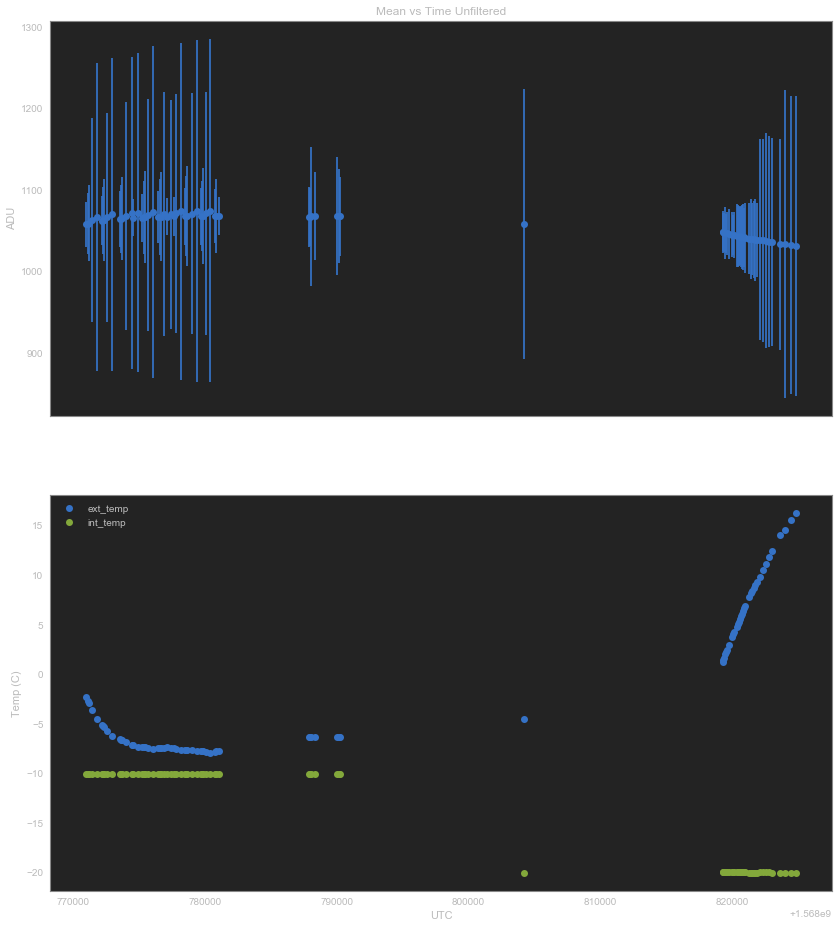

In [3]:
times = np.vectorize(ct.get_time)(flight_dark)
f = np.logical_and(int_temps < 0,means>500)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_figheight(16)
fig.set_figwidth(14)

y = means[f]
x = times[f]
err = stds[f]
ax1.errorbar(x,y,yerr=err,fmt='o')
ax1.set_ylabel("ADU")
ax1.set_title("Mean vs Time Unfiltered");

y = ext_temps[f]
ax2.plot(x,y,"o",label="ext_temp")
y = int_temps[f]
ax2.plot(x,y,"o",label="int_temp")
ax2.set_xlabel("UTC")
ax2.set_ylabel("Temp (C)")
ax2.legend();
ct.hide_toggle()

In [ ]:
plt.plot()

In [6]:
f = np.logical_and(int_temps < -18,means>500)
f2 = exptimes[f] < 1000
print("Darks at int temp = -20C:")
print(len(means[f][f2]), "Flight Dark Images at 1s")

f2 = exptimes[f]  == 10000
print(len(means[f][f2]), "Flight Dark Images at 10s")

f2 = exptimes[f]  == 20000
print(len(means[f][f2]), "Flight Dark Images at 20s")

f2 = exptimes[f]  == 30000
print(len(means[f][f2]), "Flight Dark Images at 30s")

f2 = exptimes[f]  == 150000
print(len(means[f][f2]), "Flight Dark Images at 150s")

f2 = exptimes[f]  == 300000
print(len(means[f][f2]), "Flight Dark Images at 300s")

print " "
f = np.logical_and(int_temps > -15,int_temps<0)
f2 = exptimes[f] < 1000
print("Darks at int temp = -10C:")
print(len(means[f][f2]), "Flight Dark Images at 1s")

f2 = exptimes[f]  == 10000
print(len(means[f][f2]), "Flight Dark Images at 10s")

f2 = exptimes[f]  == 20000
print(len(means[f][f2]), "Flight Dark Images at 20s")

f2 = exptimes[f]  == 30000
print(len(means[f][f2]), "Flight Dark Images at 30s")

f2 = exptimes[f]  == 150000
print(len(means[f][f2]), "Flight Dark Images at 150s")

f2 = exptimes[f]  == 300000
print(len(means[f][f2]), "Flight Dark Images at 300s")

ct.hide_toggle()

Darks at int temp = -20C:
(0, 'Flight Dark Images at 1s')
(10, 'Flight Dark Images at 10s')
(10, 'Flight Dark Images at 20s')
(5, 'Flight Dark Images at 30s')
(6, 'Flight Dark Images at 150s')
(4, 'Flight Dark Images at 300s')
 
Darks at int temp = -10C:
(4, 'Flight Dark Images at 1s')
(11, 'Flight Dark Images at 10s')
(11, 'Flight Dark Images at 20s')
(8, 'Flight Dark Images at 30s')
(10, 'Flight Dark Images at 150s')
(8, 'Flight Dark Images at 300s')


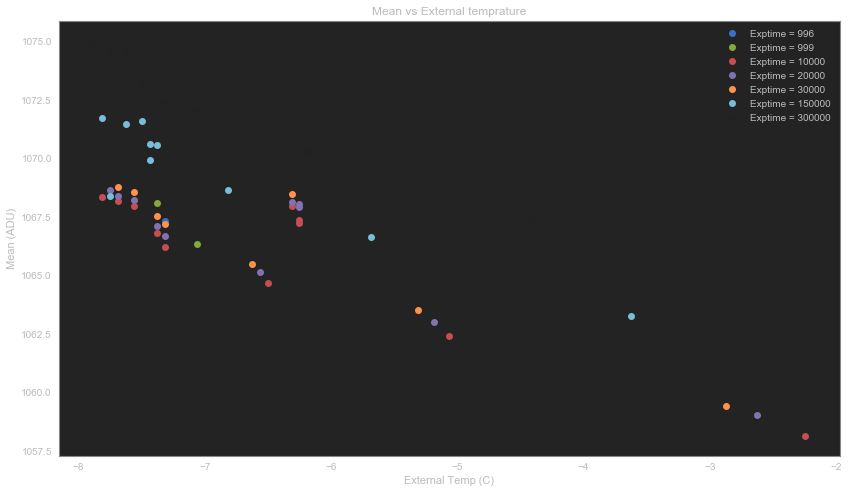

In [19]:
plt.figure(figsize=(14,8))
for exp in np.unique(exptimes):
    f = np.logical_and(np.logical_and(int_temps > -15,int_temps<0),means>0)
    f2 = exptimes[f] == exp
    x = ext_temps[f][f2]
    y = means[f][f2]
    err = stds[f][f2]
    plt.plot(x,y,"o",label = "Exptime = " + str(exp))
plt.title("Mean vs External temprature")
plt.xlabel("External Temp (C)")
plt.ylabel("Mean (ADU)")
plt.legend();
ct.hide_toggle()

## -10C Masters

In [20]:
master_bias = np.load("master_bias/master_bias_mean_10_f1-cf.npy")

In [49]:
test,std = ct.master_estimator(flight_dark,[f,f2],dark_path,width=1,mbias=master_bias)

(2.1773278959225886, -0.4526315789473756, 169.0041054666467)
(3.50900927567396, 1.0, 168.88145370725914)


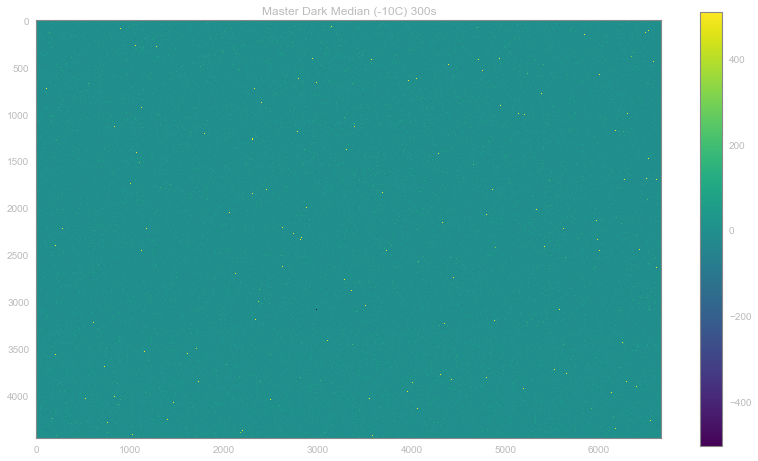

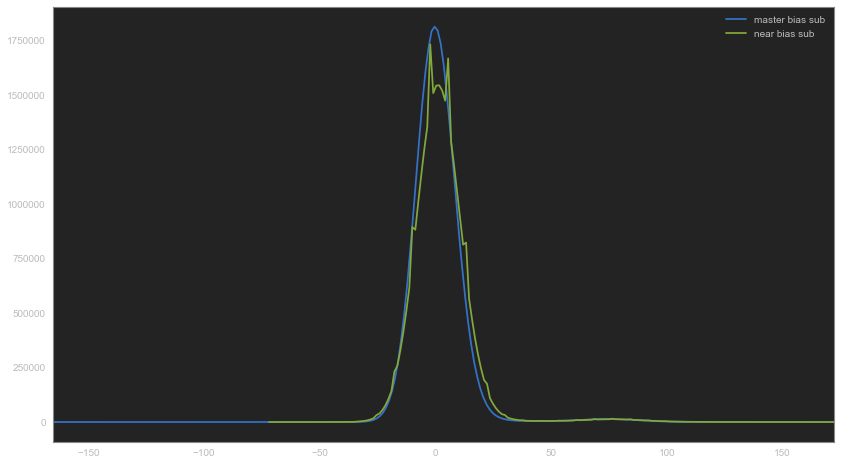

In [60]:
dark = np.load("master_dark/mbias/master_dark_median_10_300000ms.npy")
ct.plotimg(test,title="Master Dark Median (-10C) 300s")
ct.plothist(test,bins=50000,label="master bias sub",report=False)
ct.plothist(dark,nfig=False,bins=50000,label="near bias sub")
ct.hide_toggle()

(109.04753886321635, 101.40000000000009, 471.37042147371534)
(110.37922024296778, 102.5, 473.2502011386044)


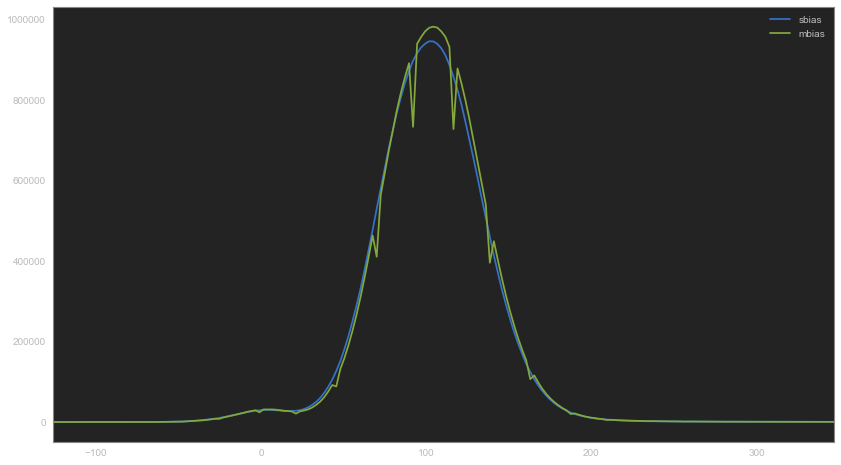

In [65]:
dark = np.load("master_dark/mbias/master_dark_median_10_300000ms.npy")
sci = "image_ifc_1568795884_15916_target_300.fits"
with fits.open(science_path + sci) as hdul:
    img0 = hdul[0].data# - master_bias_mean_10_cf -dark
    #img = img.clip(min=0)
    #ct.plotimg(img0,0.5,title="raw")
    
    img1 = hdul[0].data - master_bias - dark
    #img = img.clip(min=0)
    #ct.plotimg(img1,0.5,title="bias subtracted")
    
    img2 = hdul[0].data - master_bias - test
    #img = img.clip(min=0)
    #ct.plotimg(img2,0.5,title="bias subtracted")
    
    ct.plothist(img1,bins=50000,sig=0.5,label="sbias")
    ct.plothist(img2,bins=50000,nfig=False,sig=0.5,label="mbias")
ct.hide_toggle()